In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [13]:
# Confuguring visualization style and importing processed data
sns.set_style('whitegrid')

processed_data_path='/home/ec2-user/SageMaker/data/EmployeeData_Raw.csv'

try:
    employee_df = pd.read_csv(processed_data_path)
    print("Data loaded successfully")
except FileNotFoundError:
    print(f"Error: {processed_data_path} not found")
    employee_df = None

Data loaded successfully


Distribution of employee performance rating:
2    194
3    874
4    132
Name: PerformanceRating, dtype: int64


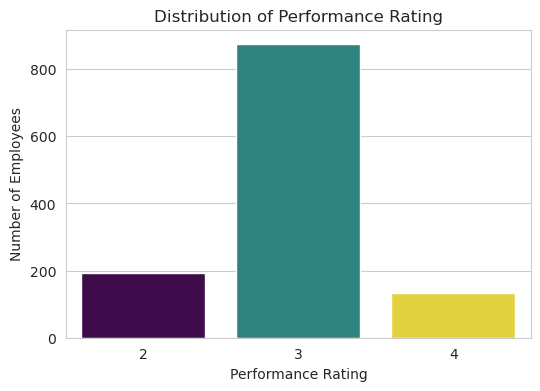

In [15]:
# Analysing Performance Rating feature as it's the target variable
print("Distribution of employee performance rating:")
print(employee_df['PerformanceRating'].value_counts().sort_index())
plt.figure(figsize=(6, 4))
sns.countplot(x='PerformanceRating', data=employee_df, palette='viridis', hue='PerformanceRating', legend=False)
plt.title('Distribution of Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Number of Employees')
plt.show()

Department wise performance rating distribution:


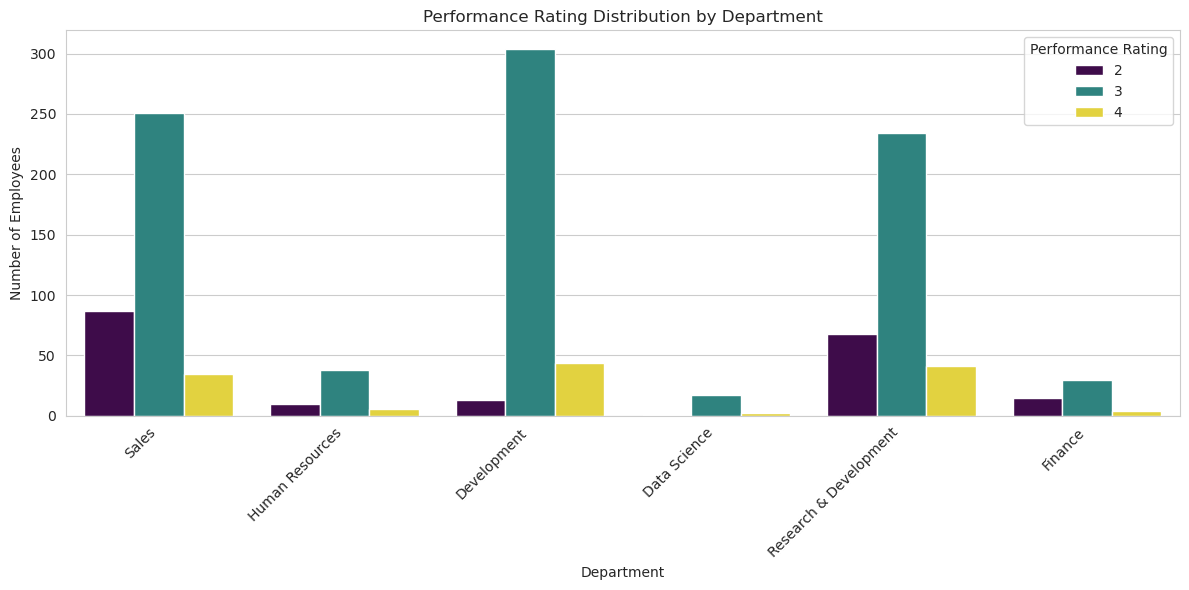

In [17]:
# Department wise performance rating EDA
print("Department wise performance rating distribution:")
plt.figure(figsize=(12, 6))
sns.countplot(x='EmpDepartment', hue='PerformanceRating', data=employee_df, palette='viridis')
plt.title('Performance Rating Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Performance Rating')
plt.tight_layout()
plt.show()

In [18]:
# Comparison against different departments considering their sizes
dept_performance = employee_df.groupby('EmpDepartment')['PerformanceRating'].value_counts(normalize=True).unstack()
print(dept_performance.to_markdown(numalign="left", stralign="left"))

| EmpDepartment          | 2         | 3        | 4         |
|:-----------------------|:----------|:---------|:----------|
| Data Science           | 0.05      | 0.85     | 0.1       |
| Development            | 0.0360111 | 0.842105 | 0.121884  |
| Finance                | 0.306122  | 0.612245 | 0.0816327 |
| Human Resources        | 0.185185  | 0.703704 | 0.111111  |
| Research & Development | 0.198251  | 0.682216 | 0.119534  |
| Sales                  | 0.233244  | 0.672922 | 0.0938338 |


Relationship between Job Satisfaction and Performance Rating:


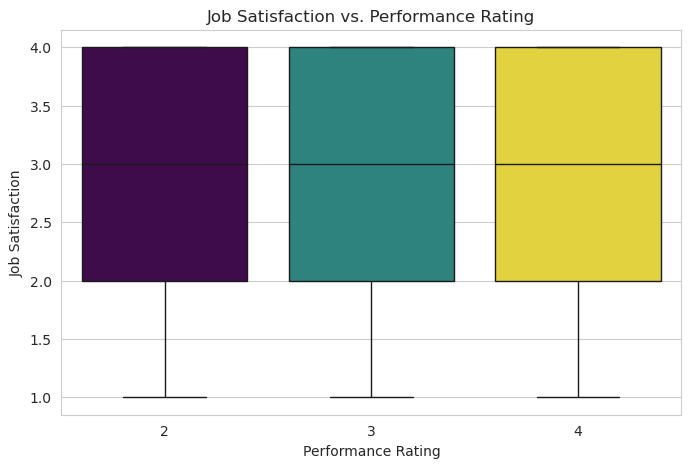

In [23]:
# Relationship between job satisfaction and performance rating
print("Relationship between Job Satisfaction and Performance Rating:")
plt.figure(figsize=(8, 5))
sns.boxplot(x='PerformanceRating', y='EmpJobSatisfaction', data=employee_df, palette='viridis', hue='PerformanceRating', legend=False)
plt.title('Job Satisfaction vs. Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Job Satisfaction')
plt.show()

Relationship between Environment Satisfaction and Performance Rating


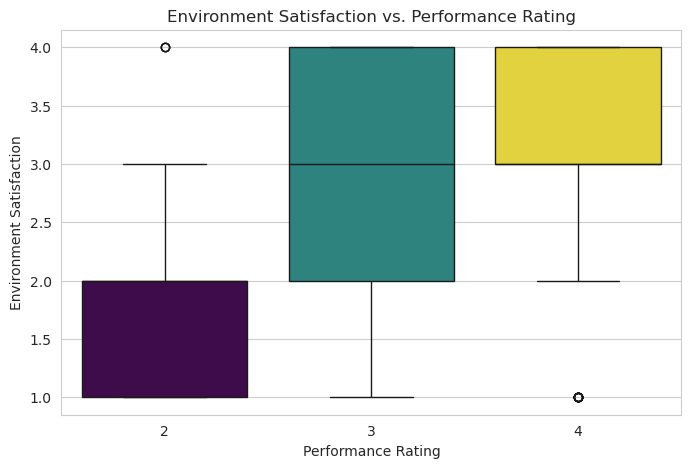

In [24]:
# Relationship between Environment Satisfaction and Performance Rating
print("Relationship between Environment Satisfaction and Performance Rating")
plt.figure(figsize=(8, 5))
sns.boxplot(x='PerformanceRating', y='EmpEnvironmentSatisfaction', data=employee_df, palette='viridis', hue='PerformanceRating', legend=False)
plt.title('Environment Satisfaction vs. Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Environment Satisfaction')
plt.show()

Relationship between Work-Life Balance and Performance Rating:


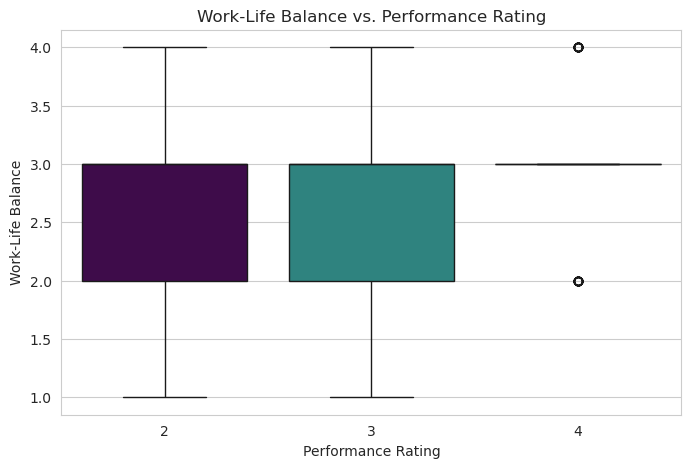

In [25]:
# Relationship between Work-Life Balance and Performance Rating
print("Relationship between Work-Life Balance and Performance Rating:")
plt.figure(figsize=(8, 5))
sns.boxplot(x='PerformanceRating', y='EmpWorkLifeBalance', data=employee_df, palette='viridis', hue='PerformanceRating', legend=False)
plt.title('Work-Life Balance vs. Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Work-Life Balance')
plt.show()

Relationship between Last Salary Hike Percentage and Performance Rating:


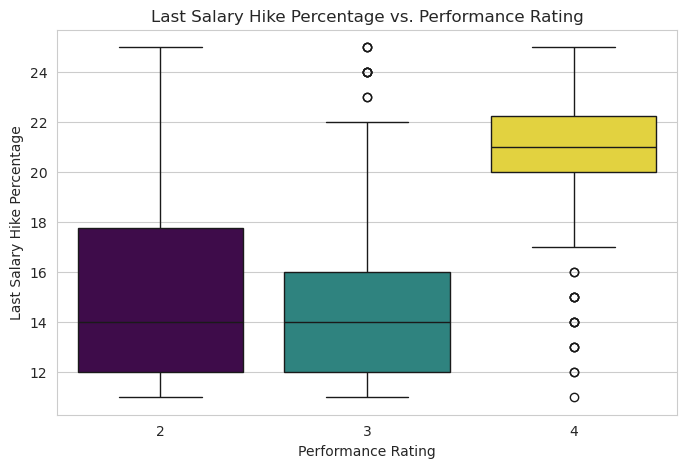

In [26]:
# Relationship between Last Salary Hike Percentage and Performance Rating
print("Relationship between Last Salary Hike Percentage and Performance Rating:")
plt.figure(figsize=(8, 5))
sns.boxplot(x='PerformanceRating', y='EmpLastSalaryHikePercent', data=employee_df, palette='viridis', hue='PerformanceRating', legend=False)
plt.title('Last Salary Hike Percentage vs. Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Last Salary Hike Percentage')
plt.show()

Relationship between Experience and Performance Rating:


<function matplotlib.pyplot.show(close=None, block=None)>

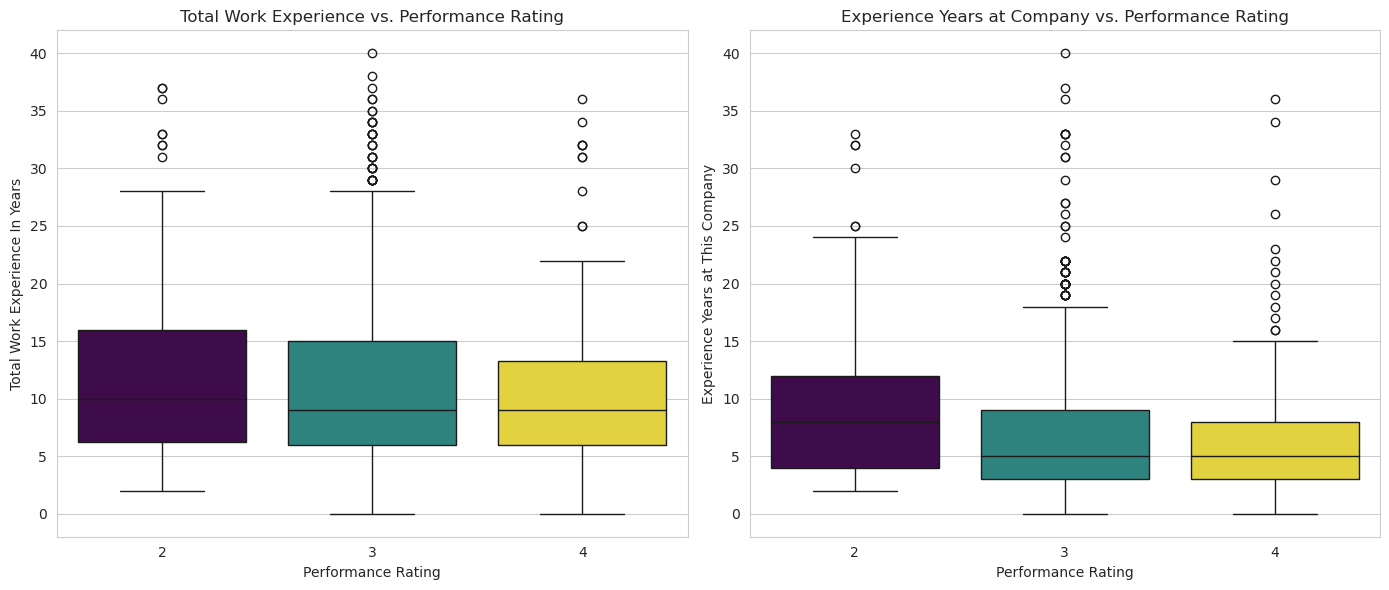

In [28]:
# Relationship between Experience and Performance Rating
print("Relationship between Experience and Performance Rating:")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='PerformanceRating', y='TotalWorkExperienceInYears', data=employee_df, palette='viridis', ax=axes[0], hue='PerformanceRating', legend=False)
axes[0].set_title('Total Work Experience vs. Performance Rating')
axes[0].set_xlabel('Performance Rating')
axes[0].set_ylabel('Total Work Experience In Years')

sns.boxplot(x='PerformanceRating', y='ExperienceYearsAtThisCompany', data=employee_df, palette='viridis', ax=axes[1], hue='PerformanceRating', legend=False)
axes[1].set_title('Experience Years at Company vs. Performance Rating')
axes[1].set_xlabel('Performance Rating')
axes[1].set_ylabel('Experience Years at This Company')

plt.tight_layout()
plt.show

Relationship between OverTime and Performance Rating:


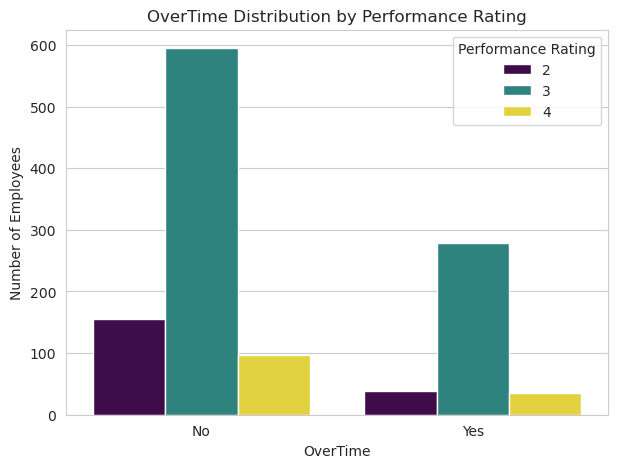

In [30]:
# Relationship between OverTime and Performance Rating
print("Relationship between OverTime and Performance Rating:")
plt.figure(figsize=(7, 5))
sns.countplot(x='OverTime', hue='PerformanceRating', data=employee_df, palette='viridis')
plt.title('OverTime Distribution by Performance Rating')
plt.xlabel('OverTime')
plt.ylabel('Number of Employees')
plt.legend(title='Performance Rating')
plt.show()

In [32]:
# Viewing as a proportion
overtime_performance = employee_df.groupby('OverTime')['PerformanceRating'].value_counts(normalize=True).unstack()
print(overtime_performance.to_markdown(numalign="left", stralign="left"))

| OverTime   | 2        | 3        | 4         |
|:-----------|:---------|:---------|:----------|
| No         | 0.182999 | 0.702479 | 0.114522  |
| Yes        | 0.110482 | 0.790368 | 0.0991501 |


Relationship between Attrition and Performance Rating:


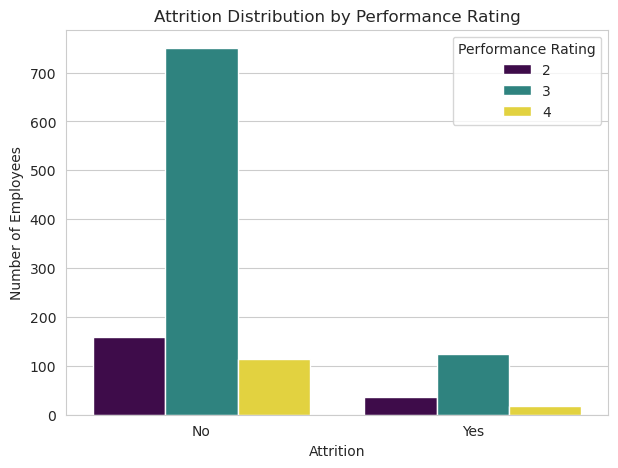

In [34]:
# Relationship between Attrition and Performance Rating
print("Relationship between Attrition and Performance Rating:")
plt.figure(figsize=(7, 5))
sns.countplot(x='Attrition', hue='PerformanceRating', data=employee_df, palette='viridis')
plt.title('Attrition Distribution by Performance Rating')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.legend(title='Performance Rating')
plt.show()

In [35]:
# Viewing as a proportion
attrition_performance = employee_df.groupby('Attrition')['PerformanceRating'].value_counts(normalize=True).unstack()
print(attrition_performance.to_markdown(numalign="left", stralign="left"))

| Attrition   | 2        | 3        | 4        |
|:------------|:---------|:---------|:---------|
| No          | 0.154599 | 0.733855 | 0.111546 |
| Yes         | 0.202247 | 0.696629 | 0.101124 |


In [36]:
# Correlation Matrix of Numerical Features and Performance Rating
print("Correlation Matrix of Numerical Features and Performance Rating:")

# Selecting numerical features
numerical_cols = employee_df.select_dtypes(include=np.number).columns

# Calculate correlation matrix
correlation_matrix = employee_df[numerical_cols].corr()

# Display correlation with performance rating
print(correlation_matrix['PerformanceRating'].sort_values(ascending=False).to_markdown(numalign="left", stralign="left"))

Correlation Matrix of Numerical Features and Performance Rating:
|                              | PerformanceRating   |
|:-----------------------------|:--------------------|
| PerformanceRating            | 1                   |
| EmpEnvironmentSatisfaction   | 0.395561            |
| EmpLastSalaryHikePercent     | 0.333722            |
| EmpWorkLifeBalance           | 0.124429            |
| NumCompaniesWorked           | 0.0209796           |
| EmpEducationLevel            | 0.020529            |
| EmpJobSatisfaction           | 0.000605942         |
| TrainingTimesLastYear        | -0.00544307         |
| EmpJobInvolvement            | -0.0105393          |
| EmpRelationshipSatisfaction  | -0.0195015          |
| Age                          | -0.0401641          |
| EmpHourlyRate                | -0.0431162          |
| DistanceFromHome             | -0.0461422          |
| TotalWorkExperienceInYears   | -0.0681412          |
| EmpJobLevel                  | -0.0766316          |


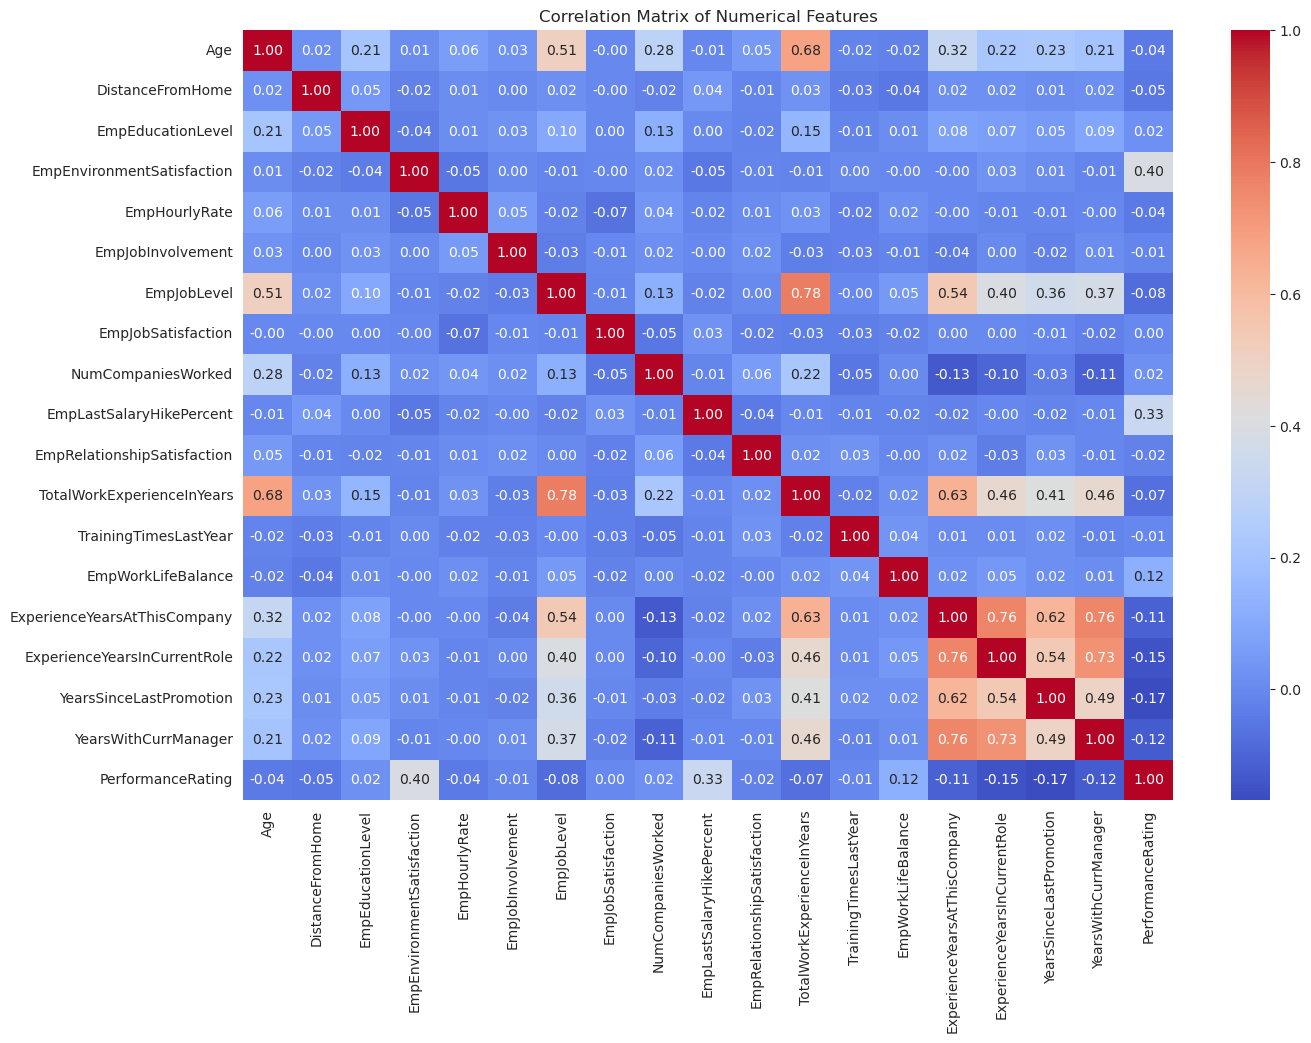

In [37]:
# Visualizing the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()